In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajumavinmar/finger-print-based-blood-group-dataset")

print("Path to dataset files:", path)

/home/rajat_paliwal/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58.1M/58.1M [00:06<00:00, 8.71MB/s]

Extracting files...


Path to dataset files: /home/rajat_paliwal/.cache/kagglehub/datasets/rajumavinmar/finger-print-based-blood-group-dataset/versions/1


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
import os
import shutil
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset_path = "dataset_blood_group"

In [14]:
BATCH_SIZE = 32

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (103, 96, 4)


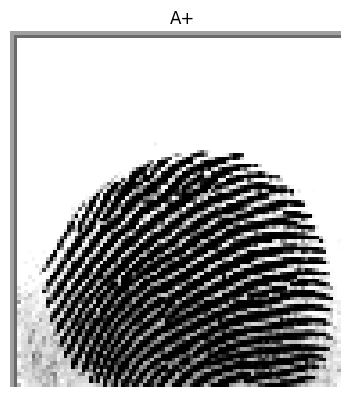

In [53]:
img = view_random_image("dataset_blood_group/", "A+")

In [54]:
# Load dataset
dataset = image_dataset_from_directory(
    dataset_path,
    labels = 'inferred',
    label_mode = 'int',
    image_size = (64, 64),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 6000 files belonging to 8 classes.


I0000 00:00:1742385518.752818     558 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [55]:
# Class distribution
class_names = dataset.class_names
class_counts = Counter()
for _, labels in dataset.unbatch():
    class_counts[int(labels.numpy())] += 1

print("Class Distribution:")
for i, count in class_counts.items():
    print(f"{class_names[i]}: {count}")

Class Distribution:
O-: 712
AB+: 708
A-: 1009
B-: 741
B+: 652
A+: 565
O+: 852
AB-: 761


2025-03-19 12:07:29.517059: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [64]:
import matplotlib.pyplot as plt

def plot_class_distribution(class_names, class_counts):
    """
    Plots the distribution of classes in the dataset.

    Parameters:
    - class_names (list): List of class names.
    - class_counts (dict): Dictionary with class indices as keys and counts as values

    Returns:
    - None
    """
    # Extract class names and their corresponding counts
    classes = [class_names[i] for i in class_counts.keys()]
    counts = [class_counts[i] for i in class_counts.keys()]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')

    # Add titles and labels
    plt.title("Class Distribution in dataset", fontsize = 16)
    plt.xlabel("Classes", fontsize = 14)
    plt.ylabel("Number of samples", fontsize = 14)

    # To show to count on the top of each bar
    for i, count in enumerate(counts):
        plt.text(i,count, str(counts[i]), ha = "center", va = "bottom", fontsize = 12)

    plt.xticks(rotation = 45)
    #plt.tight_layout()
    plt.show

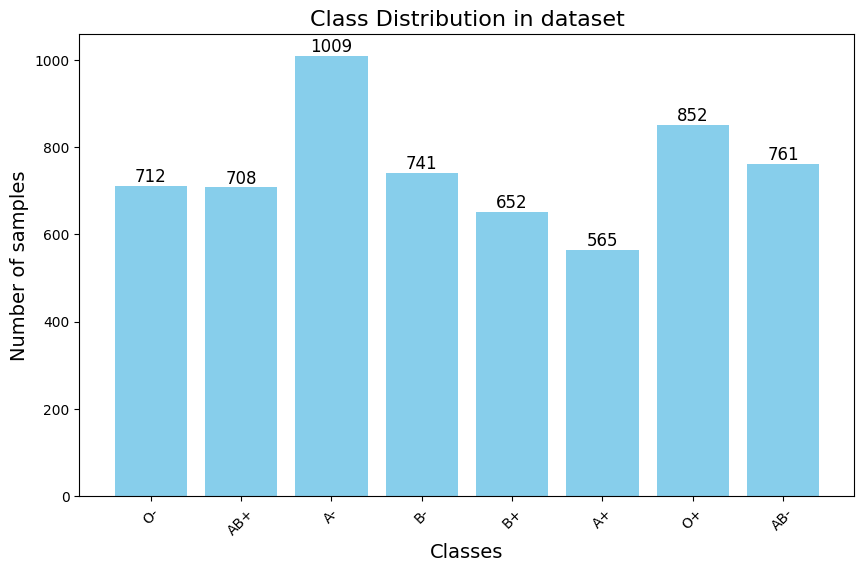

In [65]:
plot_class_distribution(class_names, class_counts)

In [67]:
max_counts = max(class_counts.values())

In [ ]:
# Function to oversample a class
def oversample_class(class_id, count, max_count):
    

1009